## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
PATIENCE=[5,10,15]

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
results = {}
for p in PATIENCE:
    earlystop = EarlyStopping(monitor="val_accuracy", 
                          patience=5, 
                          verbose=1
                          )
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "exp-Patience:%s" % str(p)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 2s 37us/step - loss: 1.3678 - accuracy: 0.5249 - val_loss: 1.5382 - val_accuracy: 0.4584
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3328 - accuracy: 0.5363 - val_loss: 1.5092 - val_accuracy: 0.4658
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3015 - accuracy: 0.5487 - val_loss: 1.5002 - val_accuracy: 0.4686
Epoch 11/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.2742 - accuracy: 0.5577 - val_loss: 1.4956 - val_accuracy: 0.4744
Epoch 12/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2469 - accuracy: 0.5688 - val_loss: 1.4752 - val_accuracy: 0.4792
Epoch 13/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.2218 - accuracy: 0.5770 - val_loss: 1.4930 - val_accuracy: 0.4739
Epoch 14/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.1960 - accuracy: 0.5879 - val_loss: 1.4691 

50000/50000 [==============================] - 2s 41us/step - loss: 1.0912 - accuracy: 0.6266 - val_loss: 1.4730 - val_accuracy: 0.4829
Epoch 21/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.0683 - accuracy: 0.6342 - val_loss: 1.4598 - val_accuracy: 0.4959
Epoch 22/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.0469 - accuracy: 0.6454 - val_loss: 1.4562 - val_accuracy: 0.4949
Epoch 23/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.0274 - accuracy: 0.6515 - val_loss: 1.4563 - val_accuracy: 0.4952
Epoch 24/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.0087 - accuracy: 0.6588 - val_loss: 1.4566 - val_accuracy: 0.4948
Epoch 25/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9880 - accuracy: 0.6656 - val_loss: 1.4680 - val_accuracy: 0.4897
Epoch 26/50
50000/50000 [==============================] - 2s 37us/step - loss: 0.9681 - accuracy: 0.6750 - val_loss: 1.4631

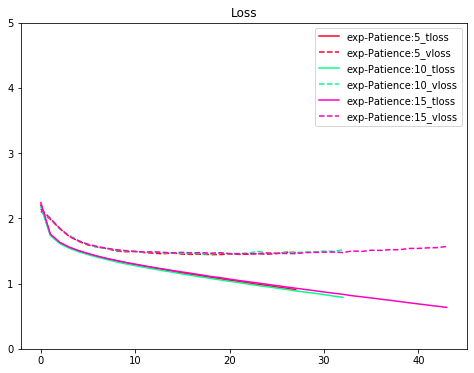

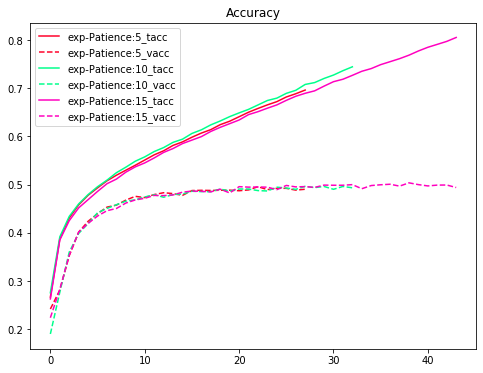

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 3

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond+'_tloss', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond+'_vloss', color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond+'_tacc', color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond+'_vacc', color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()